/home/tim/.conda/envs/ela/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tim/.conda/envs/ela/lib/python3.6/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/tim/.conda/envs/ela/lib/python3.6/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/tim/.conda/envs/ela/lib/python3.6/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


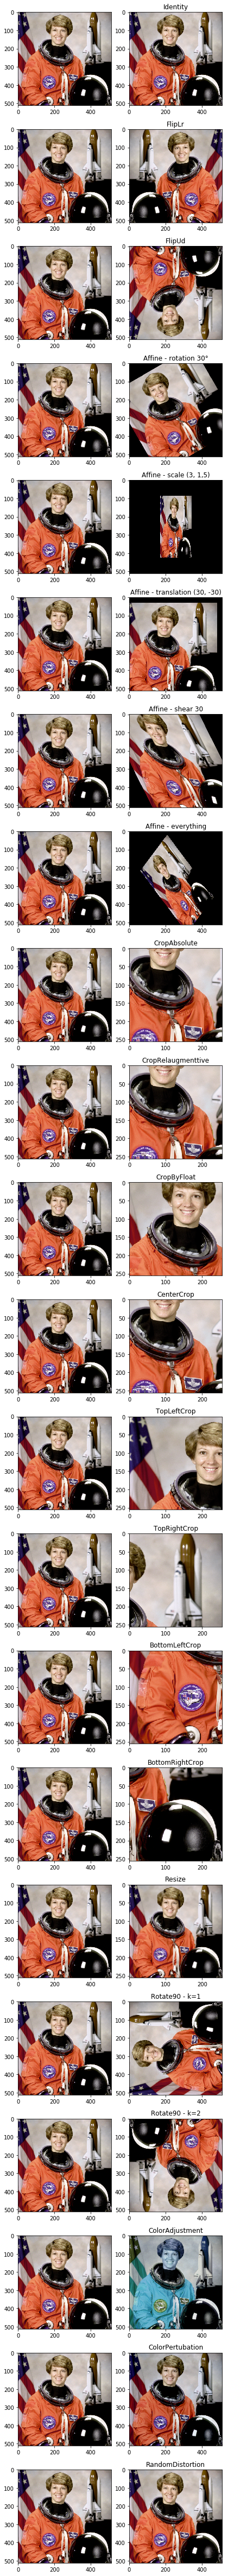

In [1]:
import numpy as np
import skimage.data
import matplotlib.pyplot as plt
%matplotlib inline

from elaugment.image import transformations, random
from elaugment.transformations import Identity

img = skimage.data.astronaut() / 255

rs = np.random.RandomState()

transforms = {
    'Identity': Identity(),
    'FlipLr': transformations.FlipLr(),
    'FlipUd': transformations.FlipUd(),
    'Affine - rotation 30°': transformations.Affine(img.shape[0], rotation=30),
    'Affine - scale (3, 1,5)': transformations.Affine(img.shape[0], scale=(3, 1.5)),
    'Affine - translation (30, -30)': transformations.Affine(img.shape[0], translation=(30, -30)),
    'Affine - shear 30': transformations.Affine(img.shape[0], shear=30),
    'Affine - everything': transformations.Affine(
        img.shape[0], 
        shear=30, 
        rotation=30,
        scale=(2, 1.5),
        translation=(30, -30)
    ),
    'CropAbsolute': transformations.CropAbsolute(256, 256, 128, 128),
    'CropRelaugmenttive': transformations.CropRelaugmenttive(0.5, 0.5, 0.25, 0.25),
    'CropByFloat': transformations.CropByFloat(256, 256, top=0.25, left= 0.25),
    'CenterCrop': transformations.CenterCrop(crop_size=256),
    'TopLeftCrop': transformations.TopLeftCrop(crop_size=256),
    'TopRightCrop': transformations.TopRightCrop(crop_size=256),
    'BottomLeftCrop': transformations.BottomLeftCrop(crop_size=256),
    'BottomRightCrop': transformations.BottomRightCrop(crop_size=256),
    'Resize': transformations.Resize((256, 256), mode='reflect'),
    'Rotate90 - k=1': transformations.Rotate90(k=1),
    'Rotate90 - k=2': transformations.Rotate90(k=2),
    'ColorAdjustment': transformations.ColorAdjustment(hue_shift=0.5, sat_shift=0.8, val_shift=0.9),
    'ColorPertubation': transformations.ColorPerturbation(alphas=[0.2, 0.2, 0.2]),
    'RandomDistortion': random.RandomDistortion(5, 5, 0.1, 0.1).draw(rs),
}

rows = len(transforms)
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
for i, key in enumerate(transforms):
    ax[i][0].imshow(img)
    ax[i][1].imshow(transforms[key](img))
    ax[i][1].set_title('{}'.format(key))
    
plt.tight_layout()

/home/tim/.conda/envs/ela/lib/python3.6/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/tim/.conda/envs/ela/lib/python3.6/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/tim/.conda/envs/ela/lib/python3.6/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]
/home/tim/.conda/envs/ela/lib/python3.6/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/tim/.conda/envs/ela/lib/python3.6/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[id

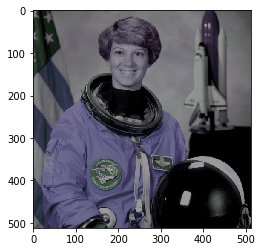

In [2]:
from matplotlib import animation, rc
from IPython.display import HTML

from elaugment import generator
from elaugment.image import random

rc('animation', html='html5')

img = skimage.data.astronaut() / 255

fig = plt.figure()

ts_train = [
    random.RandomColorAdjustment(
        hue_shift_limit=(0, 1),
        sat_shift_limit=(0, 1),
        val_shift_limit=(0, 1)
    )
]

tg_train = generator.TransformationsGenerator(ts_train)

im = plt.imshow(img, animated=True)

def updatefig(*args):
    a = next(tg_train).transform(img)
    im.set_array(a)
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=40, interval=500, blit=True)

HTML(ani.to_html5_video())

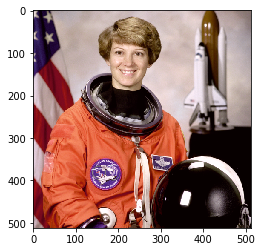

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

from elaugment import generator
from elaugment.image import random

rc('animation', html='html5')

img = skimage.data.astronaut() / 255

fig = plt.figure()

ts_train = [
    random.RandomColorPerturbation(mean=0, std=0.2)
]

tg_train = generator.TransformationsGenerator(ts_train)

im = plt.imshow(img, animated=True)

def updatefig(*args):
    a = next(tg_train).transform(img)
    im.set_array(a)
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=40, interval=500, blit=True)

HTML(ani.to_html5_video())

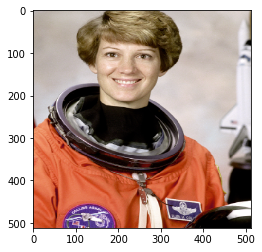

In [4]:
import skimage.data
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

from elaugment import generator, transformations
from elaugment.image import random

rc('animation', html='html5')

img = skimage.data.astronaut() / 255

fig = plt.figure()

ts_train = [
    random.RandomResizedCrop(crop_size=448, min_area=0.08)
]

tg_train = generator.TransformationsGenerator(ts_train)

im = plt.imshow(img, animated=True)

def updatefig(*args):
    a = next(tg_train).transform(img)
    im.set_array(a)
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=80, interval=250, blit=True)

HTML(ani.to_html5_video())

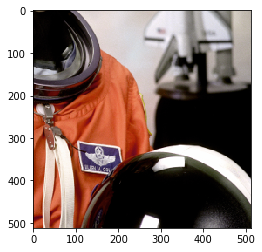

In [5]:
import skimage.data
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

from elaugment import generator
from elaugment.image import random

rc('animation', html='html5')

img = skimage.data.astronaut() / 255

fig = plt.figure()

ts_train = [
    random.RandomCrop(crop_size=250)
]

tg_train = generator.TransformationsGenerator(ts_train)

im = plt.imshow(img, animated=True)

def updatefig(*args):
    a = next(tg_train).transform(img)
    im.set_array(a)
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=80, interval=250, blit=True)

HTML(ani.to_html5_video())

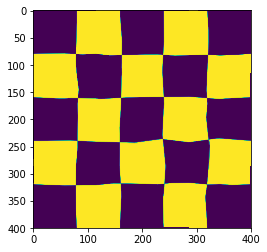

In [6]:
import skimage.data
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

from elaugment import generator
from elaugment.image import random

rc('animation', html='html5')

img = skimage.io.imread('../data/orig.png') / 255

fig = plt.figure()

ts_train = [
    random.RandomDistortion(8, 8, 0.2, 0.2, order=1)
]

tg_train = generator.TransformationsGenerator(ts_train)

im = plt.imshow(img, animated=True)

def updatefig(*args):
    a = next(tg_train).transform(img)
    im.set_array(a)
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=20, interval=250, blit=True)

HTML(ani.to_html5_video())

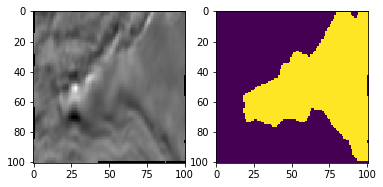

In [7]:
import skimage.data
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

from elaugment import generator
from elaugment.image import random

rc('animation', html='html5')

img = skimage.io.imread('../data/0b73b427d1.png') / 255
mask = skimage.io.imread('../data/mask.png') / 255


ts_train = [
    random.RandomDistortion(8, 8, 0.2, 0.2, order=1)
]

tg_train = generator.TransformationsGenerator(ts_train)

rows = 1
cols = 2

fig, (ax1, ax2) = plt.subplots(rows, cols)

im1 = ax1.imshow(img, animated=True)
im2 = ax2.imshow(img, animated=True)

def updatefig(*args):
    t = next(tg_train)
    x = t(img)
    y = t(mask)
    im1.set_array(x)
    im2.set_array(y)
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=20, interval=250, blit=True)

HTML(ani.to_html5_video())